## Estadistica aplicada
### Lizbeth Ramos Saucedo 1885423
#### sesion 08 a 24 de feb 2023

In [1]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
from lifelines import ExponentialFitter

In [6]:
dict1 = {'tiempo':[5,8,12,24,32,17,16,17,19,30], 'recaida':[1,1,1,1,1,1,0,0,0,0]}

In [7]:
datos=pd.DataFrame(dict1)

In [8]:
datos

,tiempo,recaida
0,5,1
1,8,1
2,12,1
3,24,1
4,32,1
5,17,1
6,16,0
7,17,0
8,19,0
9,30,0


suponer funcion de supervivencia exponencial 

$f(t)=\lambda e^{-\lambda t}, h(t)=\lambda $

$\hat{\lambda}=\frac{\sum \delta_i } {\sum t_i}$

In [12]:
ex1 = ExponentialFitter().fit(datos['tiempo'],datos['recaida'] )

In [13]:
ex1.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,30.0,12.247449,5.995442,54.004558,0.0,2.44949,0.014306,6.127248


In [14]:
ex1.hazard_  # riesgo estimado 

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [15]:
nuestra_lambda = datos['recaida'].sum()/datos['tiempo'].sum()

In [16]:
nuestra_lambda

0.03333333333333333

In [17]:
ex1.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

1. Función de densidad de probabilidad
2. Función de supervicvencia 
3. Función de riesgo 
4. Función acumulada 

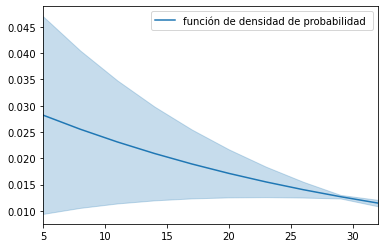

In [33]:
ex1.plot_density(label='función de densidad de probabilidad ');
plt.xlim(5,32);

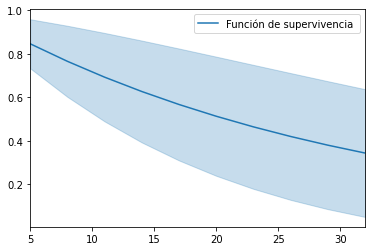

In [32]:
ex1.plot_survival_function(label='Función de supervivencia ');
plt.xlim(5,32);
#area sombreda es el intervalo de confianza 

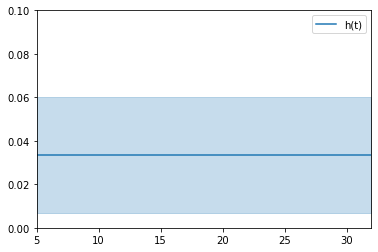

In [31]:
ex1.plot_hazard(label='h(t)');
plt.ylim(0,0.1)
plt.xlim(5,32);

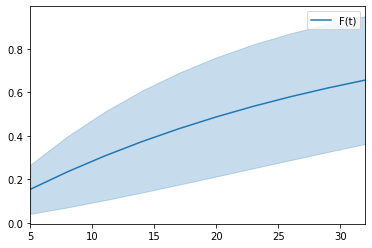

In [30]:
ex1.plot_cumulative_density(label='F(t)');
plt.xlim(5,32);

In [40]:
ex1.median_survival_time_ #calcular mediana(la que queda a mitad de los datos )

20.794415437592868


En el mes 20.8 el 50% de los pacientes ya ha sufrido la recaida de la enfermedad  

In [35]:
from lifelines.datasets import load_rossi

In [38]:
rossi= load_rossi()

In [39]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


¿si el tiempo de supervivencia ( tiempo de volver a ser arrestado) es exponencial, weibull o lognormal?

In [41]:
ex2 = ExponentialFitter ().fit(rossi['week'], rossi['arrest'])

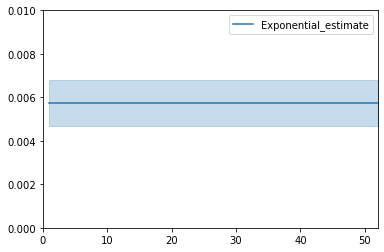

In [46]:
ex2.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0,52);

In [47]:
ex2.hazard_

,Exponential_estimate
1.000000,0.005755
1.118329,0.005755
1.236659,0.005755
1.354988,0.005755
1.473318,0.005755
...,...
51.526682,0.005755
51.645012,0.005755
51.763341,0.005755
51.881671,0.005755


In [48]:
from lifelines import WeibullFitter 

In [49]:
weib1 = WeibullFitter().fit(rossi['week'], rossi['arrest'])

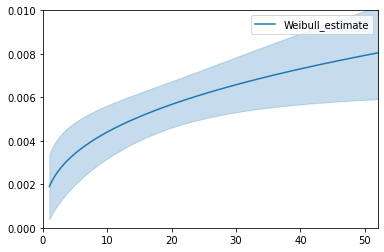

In [51]:
weib1.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0,52);

In [52]:
from lifelines import LogNormalFitter 

In [55]:
logn1 = LogNormalFitter().fit(rossi['week'], rossi['arrest'])

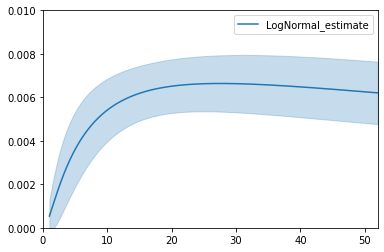

In [57]:
logn1.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0,52);

Para comparar modelos y elegir el "mejor" se suele utilizar el criterio informacion de Akaike (AIC) cuya formula es
$AIC= 2LogL +2k$ donde k es el número de parámetros a estimar.

El "mejor" modelo es el que tiene el menor valor del AIC. 
El criterio de Akaike "prefiere" modelos mas simples en lugar de complejos.

In [60]:
ex2.print_summary ()

C:\Users\Lenovo\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 432 total observations, 318 right-censored observations>
   number of observations = 432
number of events observed = 114
           log-likelihood = -701.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 173.76      16.27           141.87           205.66

          cmp to     z      p   -log2(p)
lambda_     0.00 10.68 <0.005      85.99
---
AIC = 1405.95

In [62]:
ex2.AIC_.round(2) , weib1.AIC_.round(2), logn1.AIC_.round(2) 

(1405.95, 1397.25, 1399.82)

In [67]:
print(f'exponencial {ex2.AIC_.round(2)}, weibull {weib1.AIC_.round(2)}, lognormal {logn1.AIC_.round(2) }')

exponencial 1405.95, weibull 1397.25, lognormal 1399.82


De acuerdo con el criterio de Akaike (AIC) el modelo que mejor estima el tiempo de supervivencia de volver a ser arrestado
es el modelo de Weibull. En esre modelo el riesgo de volver a ser arrestado es creciente.

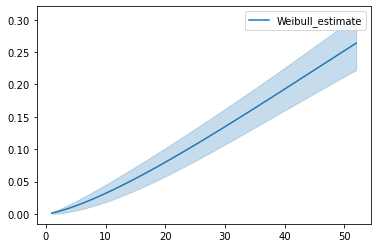

In [70]:
weib1.plot_cumulative_density();

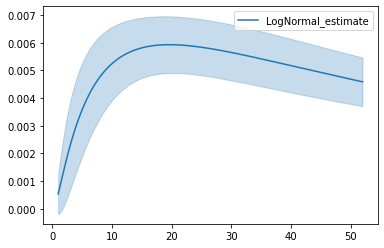

In [71]:
logn1.plot_density();